<a href="https://colab.research.google.com/github/gaws15/AINotebooksVault/blob/main/paper_01_performance_matrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IoU: 0.05
Dice Score: 0.10
Hausdorff Distance: 5.39
Precision: 0.10
Recall: 0.10


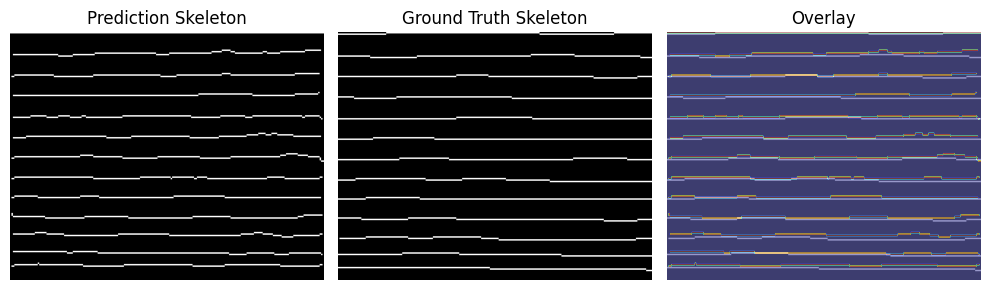

In [8]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.metrics import hausdorff_distance, structural_similarity as ssim
import matplotlib.pyplot as plt

# Read input image
def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return binary // 255  # Normalize to 0-1

# Skeletonize image
def skeletonize_image(binary):
    skeleton = skeletonize(binary)
    return skeleton

# Calculate IoU
def iou_score(pred, gt):
    intersection = np.logical_and(pred, gt)
    union = np.logical_or(pred, gt)
    return np.sum(intersection) / np.sum(union)

# Calculate Dice Score
def dice_score(pred, gt):
    intersection = np.logical_and(pred, gt)
    return 2 * np.sum(intersection) / (np.sum(pred) + np.sum(gt))

# Calculate Hausdorff Distance
def hausdorff_score(pred, gt):
    return hausdorff_distance(pred, gt)

# Calculate Precision and Recall
def precision_recall(pred, gt):
    tp = np.sum(np.logical_and(pred == 1, gt == 1))
    fp = np.sum(np.logical_and(pred == 1, gt == 0))
    fn = np.sum(np.logical_and(pred == 0, gt == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

# Main Execution
path_pred = '/content/3--zhang_suen.jpg'
path_gt = '/content/Mask.tif'

pred = read_image(path_pred)
gt = read_image(path_gt)
skeleton_pred = skeletonize_image(pred)
skeleton_gt = skeletonize_image(gt)

# Calculate Metrics
iou = iou_score(skeleton_pred, skeleton_gt)
dice = dice_score(skeleton_pred, skeleton_gt)
hd = hausdorff_score(skeleton_pred, skeleton_gt)
precision, recall = precision_recall(skeleton_pred, skeleton_gt)

# Print Results
print(f'IoU: {iou:.2f}')
print(f'Dice Score: {dice:.2f}')
print(f'Hausdorff Distance: {hd:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Prediction Skeleton')
plt.imshow(skeleton_pred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ground Truth Skeleton')
plt.imshow(skeleton_gt, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Overlay')
plt.imshow(skeleton_gt, cmap='gray', alpha=0.6)
plt.imshow(skeleton_pred, cmap='jet', alpha=0.4)
plt.axis('off')

plt.tight_layout()
plt.show()

